# 재귀함수

이번에 공부할 주제는 재귀(recursion)이다. 재귀는 한자용어로 "본래 있던 곳으로 다시 돌아온다"의 의미를 갖는다.
재귀를 이용하여 구현한 함수를 _**재귀함수(recursive function)**_라 부른다. 

## 재귀함수 용법

* 재귀함수를 사용하면 복잡한 코드를 매우 간단하게 구현할 수 있다는 장점이 있다.
* 하지만 재귀함수를 호출하면 메모리 내부에서 어떤 변화가 어떻게 발생하는가를 이해하는 일이 경우에 따라 간단하지 않다.
* 또한 시간 및 공간 복잡도가 증가해서 런타임 오류(runtime error)가 발생하기가 쉽다. 
* 특히 무한루프가 발생하지 않도록 조심해야 한다.
* 조심해서 잘 사용하면 간단하면서도 훌륭한 코드를 구현할 수 있다.

세 개의 예제를 통해 재귀함수의 전형적인 사용법을 익히고자 한다. 
또한 각 예제를 자세히 살펴보면서 앞서 언급한 재귀함수 활용의 장단점을 확인할 것이다.
이번에 다를 함수는 아래 주제와 관련되어 있다.

* 팩토리얼 계산
* 피보나찌 수열 계산
* 시에르핀스키 삼각형 계산

이후 연습문제를 통해 보다 재귀의 보다 다양한 활용을 살펴볼 것이다. 

* 퀵정렬 함수 구현

## 예제: 팩토리얼 계산

재귀함수의 가장 단순한 활용은 팩토리얼을 계산하는 함수를 작성하는 것이다.

`n` 팩토리얼(factorial)은 1부터 n까지의 연속된 자연수를 차례로 곱한 값이다. 기호로는 `n!`과 같이 느낌표(!)를 사용한다.

* `1! = 1`
* `2! = 2 * 1`
* `3! = 3 * 2 * 1`
* `4! = 4 * 3 * 2 * 1`

등등.

하지만 위와 같이 작동하는 코드를 구현할 수 없다. 예를 들어 아래와 같은 코드는 문법에 맞지 않는다.

    def factorial(n):
        return n * (n-1) * ... * 2 * 1
        
위 코드의 문제점은 바로 `'...'`에 있다. 왜냐하면 `n`에 따라 길이가 달라지기 때문이다.
그럼 어떻게 팩토리얼 함수를 구현할 수 있을까? 어떤 규칙을 찾아내야 한다. 
`n` 이 무엇이건 변하지 않는 규칙이 필요하다. 

예를 들어 다음과 같이 생각할 수도 있다. 

* `1! = 1`
* `2! = 2 * 1!`
* `3! = 3 * 2!`
* `4! = 4 * 3!`

이렇게 하면 앞서의 경우와는 달리 등호 오른편의 식의 모양이 `n`에 
따라 변하지 않으며, 단지 사용되는 숫자만 변할 뿐이다.
따라서 변하는 숫자를 인자로, 변하지 않는 모양을 리턴값으로 사용하면 된다. 
즉, `n!`를 계산하는 함수를 다음가 같이 구현할 수 있다.

##### 잠시 쉬어 가기: 

__*'규칙'이란 말 자체가 사실 변하지 않는 무언가를 찾아 내어 명시한 것들을 의미한다. 프로그래밍 관련 전문가들은 인베리언트(invariant)라 부른다. 따라서 프로그래밍의 핵심이 바로 인베리언트를 찾아내는 것이라 해도 과장이 아니다.*__

In [1]:
def factorial(n):
    return n * factorial(n-1)

그런데 위와 같이 구현한 `factorial` 함수를 호출하면 어떤 `n`에 대해서도 무한루프가 발생한다. 
이점이 바로 재귀함수를 사용할 경우 가장 많이 발생할 수 있는 오류를 설명한다.
즉, 재귀함수를 구현하고자 할 경우 반드시 어떤 경우에도 무한루프가 발생하지 않도록 제어장치를 마련해야 한다. 
예를 들어 `n` 값이 특별한 값을 갖게 되면 멈추도록 하면 된다.
아래 정의를 살펴보면  `n`의 값이 양의 정수가 아니면 `1`을 리턴하면서 더 이상의 함수호출을 하지 않는 
장치가 마련되어 있다.

In [2]:
def factorial(n):
    if n <= 0:
        return 1
    else: 
        return n * factorial(n-1)

이제 `10!`을 계산해보자.

In [3]:
factorial(10)

3628800

그런데 factorial 함수를 호출하면 메모리 내부에서 어떤 변화가 일어나는지를 이해하는 것이 중요하다.
바로 이점을 이해할 수 있으면 예를 들어 일반적으로 개인 가정에서 사용하는 PC 또는 노트북에서는 
`factorial(1000)`이 제대로 계산되지 못하는 이유도 이해할 수 있다.

`factorial(1000)`을 호출하면 아마도 약간의 시간이 흐른 뒤 RuntimeError가 발생하면서
계산이 중지되는 현상을 경험하게 될 것이다. 이것을 이해하기 위해서는 `factorial` 함수를
호출할 경우 메모리 내부에서 일어나는 일을 살펴볼 필요가 있다.

예를 들어 `factorial(10)`를 호출할 때 메모리 내부에서 일어나는 일들을 Python Tutor를 이용하여 살펴보자.

In [4]:
%load_ext tutormagic

In [5]:
%%tutor --lang python2

def factorial(n):
    if n <= 0:
        return 1
    else: 
        return n * factorial(n-1)
    
factorial(10)

`factorial(10)`를 호출하면 메모리 내부에서는 벌어지는 일을 설명하면 다음과 같다.

1. 먼저 `factorial(10)` 호출을 담당하는 메모리를 스택영역에 할당한다. 
2. 이제 `10 * factorial(9)`를 실행하기 위해 다시 `factorial(9)`를 호출한다.
    즉, `factorial(9)` 호출을 담당하는 메모리를 스택영역에 할당한다.
3. 2번 과정과 동일하게 `factorial(8)` 호출을 담당하는 메모리를 스택영역에 할당한다.
    이와 같은 작업을 `factorial(0)`이 호출될 때까지 반복한다.
4. `factorial(0)`은 `1`을 바로 리턴하기 때문에, 그 리턴값은 이제 `factorial(1)` 의 
    리턴값을 계산하는 데 사용된다. 그리고 `factorial(0)`의 호출을 위해 사용된 메모리 공간은 삭제된다.
5. 이제 `factorial(1)`은 `1 * 1`을 계산하여 `1`을 리턴한다. 
    그리고 `factorial(1)`의 호출을 위해 사용된 메모리 공간도 삭제된다.
6. 5번 과정과 동일한 과정이 `factorial(10)`의 리턴값이 계산될 때까지 반복되며, 리턴값이 주어지면 이제 
    마지막으로 `factorial(10)`의 호출을 위해 사용된 메모리 공간이 삭제된다.

좀 더 간략하게 요약정리하면 다음과 같다.

* `factorial(10)`, `factorial(9)`, ..., `factorial(0)` 의 호출을 위해 필요한 공간이 
    호출 순서대로 메모리의 스택영역에서 만들어진다.
* 이제 역순으로 `factorial(0)`, `factorial(1)`, ...., `factorial(10)`의 리턴값이 결정되며
    동시에 나열된 순서대로 사용된 스택영역의 메모리 공간이 삭제된다.
    
재귀함수를 호출할 때 사용되는 메모리 영역을 '스택'이라 부르는 이유가 바로 앞서 설명한 이유 때문이다.
즉, First In Last Out(FILO) 원칙이 성립하기 공간이 바로 스택이다.

`factorial(10)`을 호출하였을 때 메모리에서 일어나는 일들을 도식화하면 아래와 같다. 

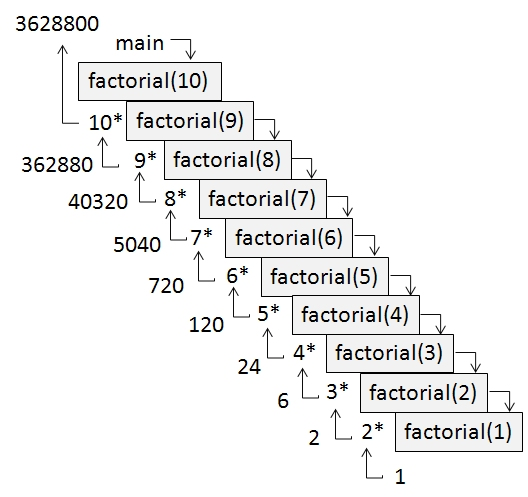

In [6]:
from IPython.display import Image

Image(filename='images/factorial-tree-recursion.jpg', width=300)

위 그림에서 계단 아래로 향하는 화살표들은 연속된 `factorial` 함수의 호출을 의미하고,
계단 위로 향하는 화살표들은 리턴값을 역순으로 넘겨주는 과정을 의미한다. 
그런데 `factorial(1000)`의 경우 위 계단 같은 현상이 너무 많이 일어나서 스택영역에 
과부하가 걸리게 되어 어느 순간 런타임 에러가 발생하게 된다.
이와같은 문제점을 해결하기 위한 해결책은 연습문제를 통해 살펴볼 예정이다.

## 예제: 피보나찌 수열

피보나치 수는 0과 1로 시작하며, 새로운 피보나치 수는 바로 앞의 두 피보나치 수의 합이 된다. 
피보나찌 수열의 처음 20개는 아래와 같다.

    0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181

`n`번째 피노나찌 수를 구해주는 함수는 아래와 같다.

In [7]:
def Fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return (Fib(n-1) + Fib(n-2))

In [8]:
Fib(10)

55

그런데 `Fib` 함수는 시간복잡도가 매우 크다. 
사실 너무 커서 실질적으로 사용할 수 없다. 
인자로 양의 정수 `n`에 대해 `2 ** n`의 복잡도를 갖는다.
`Fib(100)`도 제대로 구하지 못하는 이유가 여기에 있다.

시간복잡도가 어느정도인지를 살펴보기 위해 `Fib(5)`를 호출하였을 경우 메모리 내부에서 
어떤 변화가 발생하는지를 알아보자.

먼저 python tutor를 활용해보자.

In [9]:
%%tutor --lang python2

def Fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return (Fib(n-1) + Fib(n-2))
    
Fib(5)

그런데 'Forward' 단추를 누르면서 스택영역에서 벌어지는 일들을 추적하기가 어렵다. 
74라는 스텝수에서 알 수 있듯이 `Fib(5)`를 계사하는데 매우 많은 변화가 일어나기 때문이다. 
`Fib(10)`의 경우는 스텝수가 299로 변한다. 
즉, 인자값이 조금 늘 때마다 메모리 내부에서의 변화는 훨씬 많이 발생한다.
그렇다면 `Fib(5)`를 계산하기 위해 `Fib` 함수가 몇 번 호출될까?
아래 그림을 참고해보자.

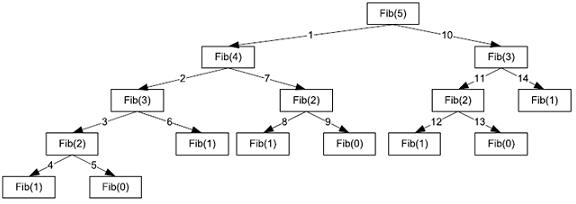

In [10]:
from IPython.display import Image

Image(filename='images/fib5-tree.jpg', width=550)

위 그림에서 `Fib` 함수가 15번 호출되었음을 확인할 수 있다. 
그렇다면 `Fib(10)`을 계산하기 위해서는 `Fib` 함수를 몇 번 호출할까?
대략 `200`번 정도 호출할 것이다. 
왜냐하면 `Fib` 한 번 호출할 때마다 두 번 더 `Fib` 함수를 호출하기 때문에 `2`의 지수승에 비례해서 호출 횟수가 증가한다.

그런데 위 그림에서 호출되는 `Fib` 함수들의 순서는 어떻게 될까? 
`factorial`의 경우는 가지치기를 하지 않기 때문에 계단 모양으로, 즉, 숫자가 감소하는 것과 동일하게 차례대로 호출이 이루어졌다.
하지만 `Fib`의 경우는 좀 더 복잡하다. 
위 그림에서 화살표에 달린 숫자들이 `Fib` 함수가 호출되는 순서를 의미한다.
왜 그럴까? 

`Fib(5)`를 호출해 보자. 그러면 아래와 같이 스택영역 상태가 변한다.

=====

1. 먼저 `Fib(5)` 호출
2. 그러면 `Fib(4) + Fib(3)`를 실행해야 하는데 이를 위해 먼저
    1. `Fib(4)` 호출. 
    2. 그러면 `Fib(3) + Fib(2)`를 실행해야 하는데 이를 위해 먼저
        1. `Fib(3)` 호출
        2. 그러면 `Fib(2) + Fib(1)`를 실행해야 하는 이를 위해 먼저
            1. `Fib(2)` 호출
            2. 그러면 `Fib(1) + Fib(0)`을 실행해야 하는데 이를 위해 먼저
                1. `Fib(1)`을 호출하여 `1`을 리턴값으로 저장한다.
                2. `Fib(0)`을 호출하여 `1`을 리턴값으로 저장한다.
            3. `1+1`을 계산하여 `Fib(2)`의 리턴값으로 `2`를 저장한다.
            4. 이제 `Fib(1)` 호출하여 `1`을 리턴값으로 저장한다. 
        3. `2 + 1`을 계산하여 `Fib(3)`의 리턴값으로 `3`을 저장한다. 
        4. 이제 `Fib(2)` 호출.
        5. 그러면 `Fib(1) + Fib(0)`을 실행해야 하는데 이를 위해 먼저
            1. `Fib(1)`을 호출하여 `1`을 리턴값으로 저장한다.
            2. `Fib(0)`을 호출하여 `1`을 리턴값으로 저장한다.
        6. `1+1`을 계산하여 `Fib(2)`의 리턴값으로 `2`를 저장한다.
    3. `3 + 2`를 계산하여 `Fib(4)`의 리턴값으로 `5`를 저장한다.
    4. 이제 `Fib(3)` 호출.
    5. 그러면 `Fib(2) + Fib(1)`를 실행해야 하는 이를 위해 먼저
        1. `Fib(2)` 호출
        2. 그러면 `Fib(1) + Fib(0)`을 실행해야 하는데 이를 위해 먼저
            1. `Fib(1)`을 호출하여 `1`을 리턴값으로 저장한다.
            2. `Fib(0)`을 호출하여 `1`을 리턴값으로 저장한다.
        3. `1+1`을 계산하여 `Fib(2)`의 리턴값으로 `2`를 저장한다.
        4. 이제 `Fib(1)` 호출하여 `1`을 리턴값으로 저장한다. 
    6. `2 + 1`을 계산하여 `Fib(3)`의 리턴값으로 `3`을 저장한다.
3. `5 + 3`를 계산하여 `8`을 `Fib(5)`의 리턴값으로 돌려준다.

=====

위와 같이 말로하면 따라가면서 이해하기가 쉽지 않다. 아래 그림을 참조하면 좀 더 쉬울 것이다. 

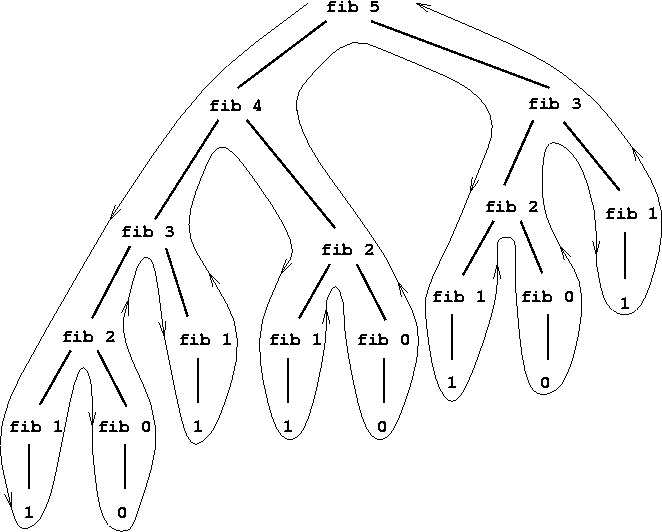

In [11]:
from IPython.display import Image

Image(filename='images/fib5-tree-recursion.jpg', width=400)

위 그림에서 화살표는 앞서의 그림에서처럼 호출되는 순서를 나타낸다.
위 그림이 마치 나무 뿌리 또는 가지가 뻗어나가는 것과 비슷하다고 해서 **나무 재귀(tree recursion)** 형식으로
`Fib` 함수가 구현되었다고 말하기도 한다.
재귀함수를 잘 활용하려면 바로 이 '나무 재귀'를 잘 이해해야 한다. 

##### 주의:
아래로 향하는 화살표는 함수호출을 의미하는 반면에
위로 향하는 화살표는 호출된 함수의 리턴값이 결정되었음을 의미한다. 

## 예제: 시에르핀스키 삼각형

앞서 다룬 피보나찌 수열의 경우처럼 나무재귀를 이용하여 구현할 수 있는 *시에르핀스키 삼각형*을 살펴보도록 하자.
피보나찌의 경우와 비슷하지만 이해가 좀 더 어려울 수 있다.

먼저, 시에르핀스키 삼각형(Sierpiński triangle)은 19세기 초반에 활동안 폴란드 수학자 바츠와프 시에르핀스키(Wacław F. Sierpiński)의 이름을 딴 프랙털 도형이다. 

시에르핀스키 삼각형은 다음과 같은 방법을 통해 얻을 수 있다:

1. 정삼각형 하나에서 시작한다.
2. 정삼각형의 세 변의 중점을 이으면 원래의 정삼각형 안에 작은 정삼각형이 만들어진다. 이 작은 정삼각형을 제거한다.
3. 남은 정삼각형들에 대해서도 2.를 실행한다.
4. 3.을 무한히 반복한다.

아래 그림 참조:

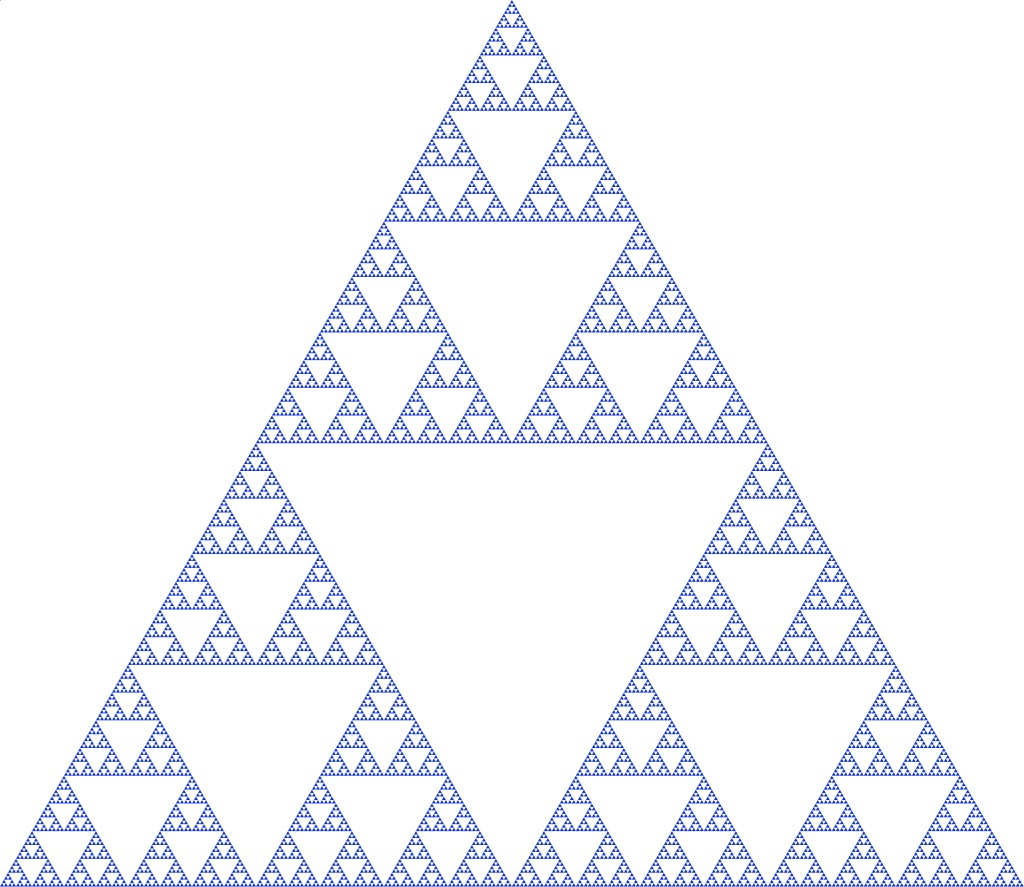

In [12]:
Image(filename='images/sierpinski.jpg', width=300)

앞서 설명에서 보았듯이 시에르핀스키 삼각형은 각 변의 길이를 반으로 나누어 세 개의 새로운 작은 삼각형을 만드는 과정을 
무한 반복하는 것이다.
즉, "각 변의 모서리를 반으로 나누어 세 개의 삼각형을 새로 만든다" 과정이 반복된다.

이것을 재귀로 구현한 파이썬 코드는 아래아 같다.

In [13]:
%matplotlib inline 

from __future__ import division

# 그래프를 그리기 위해 pyplot 모듈이 필요

import matplotlib.pyplot as plt

# pyplot의 fill 함수를 이용하여 파랑색 및 흰색 삼각형 그리는 함수

def drawBlue(p1,p2,p3):
  plt.fill([p1[0],p2[0],p3[0]],[p1[1],p2[1],p3[1]],facecolor='b',edgecolor='none')

def drawWhite(p1,p2,p3):
   plt.fill([p1[0],p2[0],p3[0]],[p1[1],p2[1],p3[1]],facecolor='w',edgecolor='none')

# 각 변의 중점을 구하는 함수

def midpoint(p1,p2):
  return ((p1[0]+p2[0])/2,(p1[1]+p2[1])/2)

# 시에르핀스키 삼각형을 구하는 함수 구현

# p1, p2, p3는 처음에 주어지는 삼각형의 세 꼭지점들의 좌표값이다.
# repeat 값은 삼각형을 쪼개는 과정을 몇 번 했는지를 세어 준다.
# limit 값은 repeat의 값의 한도를 정해준다. 
# 즉, limit 값만큼 삼각형을 쪼개는 과정을 반복한다.

def sierpinski(p1,p2,p3,repeat,limit):
  drawWhite(midpoint(p1,p2),midpoint(p2,p3),midpoint(p3,p1))
  if (repeat <= limit):
    sierpinski(p1,midpoint(p1,p2),midpoint(p1,p3),repeat+1, limit)
    sierpinski(p2,midpoint(p1,p2),midpoint(p2,p3),repeat+1, limit)
    sierpinski(p3,midpoint(p1,p3),midpoint(p2,p3),repeat+1, limit)

위 코드에서 마지막에 정의된 `sierpinski` 함수가 삼각형을 쪼개어 새로운 세 개의 삼각형을 반복적으로 
만들어주는 기능을 수행한다.

나머지 코드는 아래 내용을 담고 있다.

* 1번 줄: ipython notebook에서 그림을 보여주도록 하는 명령문임. 파이썬 코드와 별개임.
* 3번 줄: 파이썬2에서 float형 나눗셈을 위해 필요함.
* 7번 줄: `matplotlib.pyplot` 모듈이 필요함. `plt`라는 약칭 사용 선언.
* 11번 줄: `matplotlib.pyplot` 모듈에 포함되어 있는 `fill` 함수를 이용하여 세 꼬지점의 좌표가 주어질 경우 파랑색 삼각형을 그려주는 함수.
* 14번 줄: `matplotlib.pyplot` 모듈에 포함되어 있는 `fill` 함수를 이용하여 세 꼬지점의 좌표가 주어질 경우 흰색 삼각형을 그려주는 함수.
* 19번 줄: 두 꼭지점의 중점을 찾아주는 함수. 삼각형 모서리의 중점을 찾기위해 사용함. 시에르핀스키 삼각형을 만들기 위해 필요함.
* 29번 줄: 시에르핀스키 함수 정의 
    1. 필요한 인자
        1. p1, p2, p3: 시작할 때 필요한 삼각형의 세 꼭지점 좌표
        2. repeat: 삼각형 쪼개기 과정을 몇 번 반복하였는지 기억한다.
        3. limit: 삼각형 쪼개기 과정을 반복할 수 있는 횟수의 최대 허용치를 선언하기 위해 사용된다.
    2. 이 함수를 호출하면 제일먼저 '30번 줄'이 실행되어 삼각형을 한 번 쪼개어 중간 부분의 역삼각형을 흰색으로 칠한다. 
    3. 이제 '31번 줄'로 넘어와서 repeat 값이 limit 값을 초과했는지를 확인한다.
        1. 초과하였을 경우: 작동을 멈춘다. 즉, 더이상의 쪼개기 반복이 없다.
        2. 초과하지 않았을 경우:
            1. '32번 줄'로 넘어와서 `sierpinski` 함수를 다시 호출한다. 
                대신에 새로 생성된 작은 삼각형 중에서 왼쪽 아래에 위치한 삼각형에 대해서, 그리고
                repeat 값을 하나 증가시킨 값에 대해서 '30번 줄'부터 다시 실행한다. 
                즉, repeat값이 limit 값을 초과할 때 까지 위에서 설명한 작업을 반복한다. 
                반복할 때마다 `sierpinski` 함수 호출에 사용되는 인자들의 값이 변함에 주의해야 한다.
            2. '32번 줄'에서 호출한 `sierpinski` 함수가 중단된 후에야 
                '33번 줄'로 넘어와서 다시 `sierpinski` 함수를 호출한다. 
                이번에 사용되는 인자는 새로 생성된 작은 삼각형 중에서 오른쪽 아래에 위치한 삼각형의 꼭지점이며
                나머지 인자들의 값과 행동방식은 a.의 경우와 동일하다.
            3. '34번 줄'은 앞선 '33번 줄'의 `sierpinski` 함수의 호출이 완료된 후에야 실행되며
                새로 생성된 작은 삼각형 중에서 가운데 위에 위치한 삼각형의 꼭지점이 사용된다. 
                나머지 인자들의 값과 행동방식은 a. 의 경우와 동일하다.
                
이제 `sierpinski` 함수를 이용하여 시에르핀스키 삼각형을 그려보자.
limit 값을 이용하여 쪼개기 반복 횟수를 제한해야 하는데 6정도가 좋다. 
그 이상은 시간이 너무 올래 걸리며 사람 눈으로는 섬세함 정도가 구분되지 않는다.

pyplot 모듈을 이용하여 그린 그림을 확인하려면 아래 코드에서 '3번 ~ 5번' 줄과 '18번' 줄에 있는 명령어를 실행해야 한다.
보다 자세한 설명은 이후에 다뤄질 예정이다. 
우선 따라하는 것만으로도 충분하다.

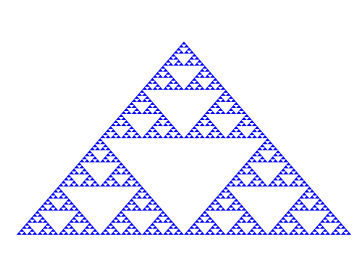

In [14]:
# pyplot 에서 그림을 그리기 위한 준비 작업 필요

plt.figure()
plt.subplot(1,1,1)
plt.axis('off')

# 먼저 하나의 파란색 삼각형을 그린다. 

drawBlue((0,0),(7,0),(3.5,6.0621778265))

# 이제 주어진 파란색 삼각형을 세 개의 작은 삼각형으로 쪼개어 흰색으로 칠하는 과정을 반복한다. 
# 아래 예제는 limit 값을 4으로 주었다.

sierpinski((0,0),(7,0),(3.5,6.0621778265),0,4)

# 이제 그림을 보여달라고 해야 한다.

plt.show()

위 그림이 만들어지는 과정은 아래와 같다.

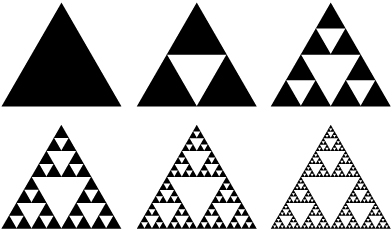

In [15]:
Image(filename='images/sierpinski-cases.jpg', width=400)

피보나찌 수열의 경우와 마친가지로 `sierpinski` 함수가 호출되는 순서, 
즉 각각의 삼각형이 만들어지는 순서를 이해할 수 있어야 한다. 
아래 그림을 참조할 수 있다.

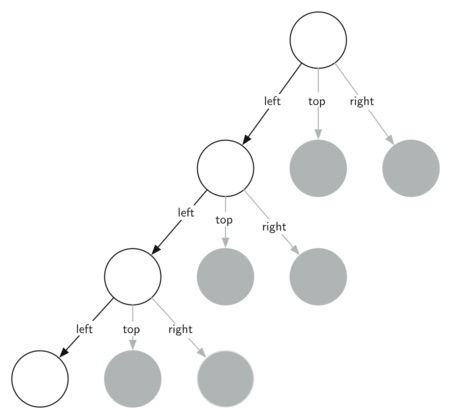

In [16]:
Image(filename='images/sierpinski-tree-recursion.jpg', width=350)

`Fib`함수의 경우와는 달리 `sierpinski` 함수가 호출될 때마다 세 개의 가지를 새로 친다. 
하지만 `Fib` 함수의 경우처럼 각각의 함수가 호출되어 리턴값이 결정될 때 까지 다른 가지의 호출은 기다려야 한다.
즉,`Fib`의 경우보다 좀 더 많은 가지를 가진 나무재귀 모양을 띄지만 작동하는 방식은 기본적으로 동일하다.

## 재귀함수 활용 요약 정리

* 세 개의 예제를 활용해 재귀의 활용을 살펴보았다.
* 재귀함수를 호출하였을 경우 메모리 스택영역에서 함수호출이 어떤 순서로 영향을 미치는가를 살펴보았다.
* 특히, 나무재귀(tree recursion)에 대한 이해가 제일 중요하다는 것을 명심해야 한다. 

# 연습문제

## 연습: 퀵정렬 함수 구현

퀵 정렬은 아래에 설명된 분할 정복(divide and conquer) 방법을 통해 리스트를 정렬한다.

1. 리스트 가운데서 하나의 원소를 임의로 고른다. 
    이렇게 고른 원소를 _피벗_이라 하며 리스트의 첫번 째 항목을 선택해도 일반적으로 무난하다.
2. 기존의 리스트를 두 개의 새로운 리스트로 쪼갠다. 
    1. 처음 리스트는 피벗보다 값이 크지 않은 모든 원소들로 구성되고,
    2. 둘째 리스트는 피벗보다 큰 모든 원소들로 구성된다.
    3. 피벗을 기분으로 처음 리스트는 피벗의 왼편에, 둘째 리스트는 피벗의 오른편에 위치시킨다. 
3. 분할된 두 개의 작은 리스트에 대해 재귀(Recursion)적으로 이 과정을 반복한다. 
    재귀는 리스트의 길이가 0이나 1이 될 때까지 반복된다.

재귀 호출이 한번 진행될 때마다 인자로 사용되는 리스트의 길이가 최소한 하나씩 줄게되므로, 이 알고리즘은 반드시 끝난다.
이제 리스트 자료형을 인자로 입력받아 해당 리스트를 오름차순으로 정렬하는 함수 `quicksort`를 구현해보자.

_**힌트: Wikipedia에서 퀵정렬을 설명하면서 사용한 유사코드는 다음과 같다.**_

    function quicksort(array)
        var list less, greater 
        if length(array) < 2
            return array
        select and remove a pivot value pivot from array 
        for each x in array
        if x < pivot + 1 
            append x to less 
        else 
            append x to greater 
        return concatenate(quicksort(less), pivot, quicksort(greater))

### 견본답안

In [17]:
def quicksort(array):
    if len(array) < 2:
        return array
    else:
        pivot = array[0]
        less = []
        greater = []
        for i in range(len(array))[1:]:
            if array[i] <= pivot:
                less.append(array[i])
            else:
                greater.append(array[i])
        return quicksort(less) + [pivot] + quicksort(greater)

In [18]:
quicksort([3, 2, 5, 1, 8, 20, 18, 100, 70])

[1, 2, 3, 5, 8, 18, 20, 70, 100]

##### 생각해보기

위 코드는 공간복잡도가 높은 편이다. 
`quicksort`가 호출될 때마다 `less`와 `greater`  두 개의 리스트를 새로 생성하기 때문이다. 
따라서 매우 긴 리스트를 정렬할 때는 런타임에러가 발생할 수도 있다. 
이를 개선하기 위해서는 새로운 리스트를 생성하는 대신에 피벗과 숫자들의 위치를 교환(swap)하는 방식으로
코딩할 수 있다. 또한 피벗을 정하는 방식에 따라 정렬의 실행 속도에 차이가 발생할 수 있다.
보다 자세한 설명은 아래 사이트를 참조하면 좋다.

[https://ko.wikipedia.org/wiki/%ED%80%B5_%EC%A0%95%EB%A0%AC](https://ko.wikipedia.org/wiki/%ED%80%B5_%EC%A0%95%EB%A0%AC)

##### 생각해보기

아래 명령어가 실행되었을 경우 해당 리스트가 정렬되는 과정을 그림으로 그려볼 수 있어야 한다.
나무 재귀가 작동하는 방식을 이해하면 따라할 수 있다.

    quicksort([3, 2, 5, 1, 8, 20, 18, 100, 70])